Copyright 2018 Artificial Intelligence Research Institute(AIRI), Korea

This file is part of lathe-and-shatter.
lathe-and-shatter is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

lathe-and-shatter is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with lathe-and-shatter.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
%matplotlib inline

- http://wias-berlin.de/software/tetgen/1.5/doc/manual/manual.pdf
- http://wias-berlin.de/software/tetgen/fformats.html
- http://wias-berlin.de/software/tetgen/fformats.examples.html
- http://wias-berlin.de/software/tetgen/1.5/doc/manual/manual005.html

- `-p	Tetrahedralizes a piecewise linear complex (PLC).`
- `-Y	Preserves the input surface mesh (does not modify it).`
- `-r	Reconstructs a previously generated mesh.`
- `-q	Refines mesh (to improve mesh quality).`
- `-A	Assigns attributes to tetrahedra in different regions`
- `-M	No merge of coplanar facets or very close vertices.`
- `-C	Checks the consistency of the final mesh.`

- A region attribute is an integer which can be either positive or negative. It must not be a zero, which is used for the exterior of the PLC.
- User-defined attributes are assigned to regions by the `.poly` or `.smesh` file (in the region section). If a region is not explicitly marked by the `.poly` file or `.smesh` file, tetrahedra in that region are automatically assigned a non-zero attribute.
- By default, the region attributes are numbered from 1, 2, 3, ⋯. If there are user-assigned region attributes (by the `.poly` or `.smesh` file), the region attributes are shifted by a number _i_, i.e., _i_+1, _i_+2, _i_+3, ⋯, where i is either 0 or the maximum integer of the user-assigned region attributes.
- The `-A` switch has an effect only if the `-p` switch is used and the `-r` switch is not.


In [2]:
%%bash
if [ outputs/generated_lathe.smesh -nt outputs/generated_lathe.1.node ]
then
    rm -fv outputs/tetgen-error.log outputs/generated_lathe.[0-9].*
    tetgen -p outputs/generated_lathe.smesh > outputs/tetgen-error.log 2>&1
#     tetgen -pq generated_lathe.smesh > tetgen-error.log 2>&1
#     tetgen -pY generated_lathe.smesh > tetgen-error.log 2>&1
#     tetgen -pAY generated_lathe.smesh > tetgen-error.log 2>&1
#     tetgen -pqAY generated_lathe.smesh > tetgen-error.log 2>&1
#     tetgen -pYMC generated_lathe.smesh > tetgen-error.log 2>&1
#     tetgen -pqYMC generated_lathe.smesh > tetgen-error.log 2>&1
#     tetgen -pqAYMC generated_lathe.smesh > tetgen-error.log 2>&1
    ls -s outputs/generated_lathe.[0-9].*
fi

 6696 outputs/generated_lathe.1.edge
14840 outputs/generated_lathe.1.ele
10364 outputs/generated_lathe.1.face
15800 outputs/generated_lathe.1.node


In [3]:
%more outputs/tetgen-error.log

In [8]:
# coding: utf-8
from __future__ import print_function,division,absolute_import
import numpy as np

In [9]:
import os
assert os.path.exists('outputs/generated_lathe.1.ele')

In [10]:
# from pattern import load_pattern_json
# num_groups, voronoi_points, voronoi_group = load_pattern_json('outputs/voronoi_shatter.json')

In [11]:
filename = 'outputs/voronoi_shatter.json'

In [12]:
import json

class Dummy: pass

with open(filename,'r') as f:
    shatter = Dummy()
    vars(shatter).update(json.load(f))

num_groups, voronoi_points, voronoi_group = shatter.num_groups, \
    np.array(shatter.point), np.array(shatter.point_group)

In [13]:
from tetgen_object import load_tetgen, elems_to_faces
tetgen_obj = load_tetgen('outputs/generated_lathe.1')

In [14]:
position = tetgen_obj.nodes.points[:]
texcoord = tetgen_obj.nodes.attrs[:]
boundary = tetgen_obj.nodes.boundary_markers[:]
elems = tetgen_obj.elems.elems[:]
elems_attr = tetgen_obj.elems.attrs[:]
faces = tetgen_obj.faces.faces[:]
faces_boundary = tetgen_obj.faces.boundary_markers[:]

In [15]:
x, y, z = position.transpose()
triangles = faces

In [16]:
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.0,1.0,17))[:,:3]

In [17]:
# face 의 boundary marker 를 가지고 컬러
vert_group = np.zeros([len(position)],dtype=int)

# face_group = -(faces_boundary+2)
# for i,f in enumerate(faces):
#     group = face_group[i]
#     vert_group[f[0]] = group
#     vert_group[f[1]] = group
#     vert_group[f[2]] = group
vert_color = colors[boundary] ## [vert_group]

import ipyvolume.pylab as p3
import numpy as np

p3.figure()
p3.plot_trisurf(x, -y, z, triangles=triangles, color=vert_color)
p3.squarelim()
p3.show()

In [18]:
# node (vertices) 의 texcoord 를 가지고 컬러

from pattern import find_voronoi_group
vert_group = find_voronoi_group(texcoord,voronoi_points,voronoi_group)
vert_color = colors[vert_group]

import ipyvolume.pylab as p3

p3.figure()
p3.plot_trisurf(x, -y, z, triangles=triangles[:], color=vert_color)
p3.squarelim()
p3.show()

/data2/AIRI/lathe-and-shatter/pattern.py:89: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packa

In [19]:
# 선택된 elems 의 v 좌표 분포

# uvcoords = np.amin(texcoord[elems],axis=1)
# uvcoords = np.mean(texcoord[elems],axis=1)
uvcoords = np.amax(texcoord[elems],axis=1)

# 해보니까, np.amax() 가 개중 훌륭함

(array([19375., 36658., 34194., 57170., 75318., 68550., 60913., 33957.,
        33847., 25766.]),
 array([8.850000e-04, 1.007965e-01, 2.007080e-01, 3.006195e-01,
        4.005310e-01, 5.004425e-01, 6.003540e-01, 7.002655e-01,
        8.001770e-01, 9.000885e-01, 1.000000e+00]),
 <a list of 10 Patch objects>)

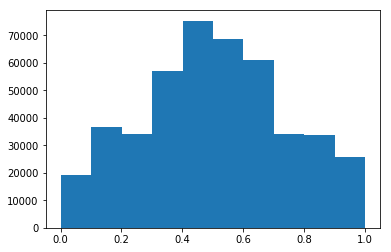

In [20]:
import matplotlib.pyplot as plt
plt.hist(uvcoords[:,1])

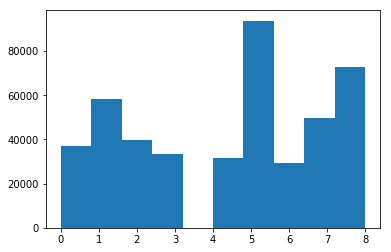

In [21]:
# 선택된 elems 의 uv 좌표를 가지고 group 을 찾았을 때의 그룹 분포

from pattern import find_voronoi_group
elem_group = find_voronoi_group(uvcoords,voronoi_points,voronoi_group)

import matplotlib.pyplot as plt
plt.hist(elem_group);

In [22]:
# sel = 3
# selected_elems = elems[elem_group == sel]
# triangles = elems_to_faces(selected_elems)

# import ipyvolume.pylab as p3

# p3.figure()
# p3.plot_trisurf(x, -y, z, triangles=triangles, color=vert_color)
# p3.squarelim()
# p3.show()

In [23]:
import ipyvolume.pylab as p3
from ipywidgets import interact,IntSlider

@interact(sel=IntSlider(min=0,max=num_groups-1,value=0,continuous_update=False))
def show_shatter(sel):
    selected_elems = elems[elem_group == sel]
    t_shatter = elems_to_faces(selected_elems)

    p3.figure()
    p3.plot_trisurf(x, -y, z, triangles=t_shatter[:], color=vert_color)
    p3.xlim(-500,500)
    p3.ylim(-500,500)
    p3.zlim(-500,500)
    p3.show()

interactive(children=(IntSlider(value=0, continuous_update=False, description='sel', max=8), Output()), _dom_c…

In [24]:
import sys
for sel in range(num_groups):
    part_name = 'outputs/generated_lathe_part_{:d}'.format(sel+1)
    print('writing',part_name,file=sys.stderr)
    selected_elems = elems[elem_group == sel]
    obj3 = tetgen_obj.rebuild(selected_elems)
    obj3.save(part_name)

writing outputs/generated_lathe_part_1
writing outputs/generated_lathe_part_2
writing outputs/generated_lathe_part_3
writing outputs/generated_lathe_part_4
writing outputs/generated_lathe_part_5
writing outputs/generated_lathe_part_6
writing outputs/generated_lathe_part_7
writing outputs/generated_lathe_part_8
writing outputs/generated_lathe_part_9


In [21]:
assert 0

AssertionError: 

In [25]:
# retry rebuild()

In [26]:
from tetgen_object import load_tetgen, elems_to_faces
tetgen_obj = load_tetgen('outputs/generated_lathe.1')
# tetgen_obj = load_tetgen('outputs/twolayermdl.1')

position = tetgen_obj.nodes.points[:]
texcoord = tetgen_obj.nodes.attrs[:]
boundary = tetgen_obj.nodes.boundary_markers[:]

faces = tetgen_obj.faces.faces[:]
face_boundary = tetgen_obj.faces.boundary_markers[:]

elems = tetgen_obj.elems.elems[:]
elem_attrs = tetgen_obj.elems.attrs[:]

In [27]:
position.shape,boundary.shape,  faces.shape,face_boundary.shape,  elems.shape,elem_attrs.shape

((149096, 3), (149096,), (297988, 3), (297988,), (445748, 4), (0,))

In [28]:
# # method A

# from pattern import find_voronoi_group
# face_uvcoords = np.amax(texcoord[faces],axis=1)
# face_group = find_voronoi_group(face_uvcoords,voronoi_points,voronoi_group)
# node_group = find_voronoi_group(texcoord,voronoi_points,voronoi_group)
# np.amin(node_group),np.amax(node_group),np.amin(face_group),np.amax(face_group)

In [29]:
# method B

node_group = -(2+tetgen_obj.nodes.boundary_markers)
face_group = -(2+tetgen_obj.faces.boundary_markers)
np.amin(node_group),np.amax(node_group),np.amin(face_group),np.amax(face_group)

(-2, 8, 0, 8)

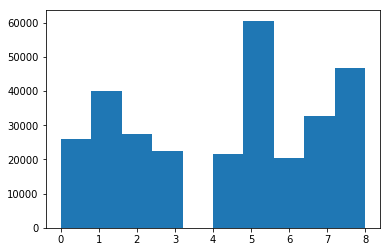

In [30]:
plt.hist(face_group);

In [31]:
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.0,1.0,17))[:,:3]

In [32]:
vert_group = np.zeros(len(x),dtype=int)
for i,f in enumerate(faces):
    vert_group[f[0]] = face_group[i]
    vert_group[f[1]] = face_group[i]
    vert_group[f[2]] = face_group[i]
vert_color = colors[vert_group]

In [33]:
# vert_color = colors[node_group]

In [34]:
sel = 1

In [35]:
x, y, z = position.transpose()
triangles = faces[face_group==sel]

In [36]:
selected_elems = elems[elem_group==sel]

lines1 = selected_elems[:,[0,1]]
lines2 = selected_elems[:,[0,2]]
lines3 = selected_elems[:,[0,3]]
lines4 = selected_elems[:,[1,2]]
lines5 = selected_elems[:,[1,3]]
lines6 = selected_elems[:,[2,3]]

lines = np.concatenate([lines1,lines2,lines3,lines4,lines5,lines6],axis=0)

In [37]:
lines1 = triangles[:,[0,1]]
lines2 = triangles[:,[0,2]]
lines3 = triangles[:,[1,2]]

lines = np.concatenate([lines1,lines2,lines3],axis=0)

In [38]:
import ipyvolume.pylab as p3

p3.figure()
# p3.plot_trisurf(x, -y, z, triangles=triangles, color=vert_color)
p3.plot_trisurf(x, -y, z, triangles=triangles, lines=lines, color=vert_color)
p3.squarelim()
p3.show()

In [39]:
from pattern import find_voronoi_group

In [40]:
# elem_uvcoords = np.amax(texcoord[elems],axis=1) # np.amax or np.amin or np.mean
elem_u = np.amax(texcoord[elems][:,:,0],axis=1)
elem_v = np.mean(texcoord[elems][:,:,1],axis=1)
elem_uvcoords = np.transpose([elem_u,elem_v],[1,0])
elem_group = find_voronoi_group(elem_uvcoords,voronoi_points,voronoi_group)

In [41]:
sel = 5

In [42]:
x, y, z = position.transpose()
# triangles = faces[face_group==sel]
triangles = elems_to_faces(elems[elem_group==sel])

In [43]:
import ipyvolume.pylab as p3

p3.figure()
p3.plot_trisurf(x, -y, z, triangles=triangles, color=vert_color)
p3.squarelim()
p3.show()